In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
import os

# Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
#loading wholesale distributor data
df_wcd = pd.read_csv('Wholesale Customer.csv')
pd.set_option('display.max_rows',None)
df_wcd.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
df_wcd.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [4]:
# information regarding the data
df_wcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
# checking null values
df_wcd.isnull().sum() 

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [6]:
# lets drop the buyer/spender column from the data
df_wcd = df_wcd.drop('Buyer/Spender', axis = 1)

#### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [7]:
# Using describe function checking description of categorical columns such as Unique, top, frequency and of numerical columns such as mean, std dev, min, max, quartile 1, 2,3 values.
display(df_wcd.describe(include='all'))

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [8]:
# add a new column of total sum to add all items spending
df_wcd['Total_sum'] = df_wcd['Fresh']+df_wcd['Milk']+df_wcd['Grocery']+df_wcd['Frozen']+df_wcd['Detergents_Paper']+df_wcd['Delicatessen']

# Now let us see which channel has highest and lowest spending from total sum column
Total_sum_Channel = df_wcd.groupby('Channel')['Total_sum'].sum()
Total_sum_Channel

Channel
Hotel     7999569
Retail    6619931
Name: Total_sum, dtype: int64

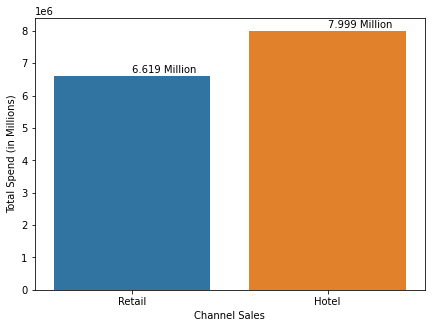

In [9]:
# confirm the same with the help of data visualization
plt.figure(figsize=(7,5))
sns.barplot( x='Channel', y='Total_sum', estimator = np.sum, data=df_wcd, ci=None, orient='v')
plt.ylabel("Total Spend (in Millions)")
plt.xlabel("Channel Sales")

plt.text(0, 6720000, str('6.619 Million'))
plt.text(1, 8100085, str('7.999 Million'))
         
plt.show()

###### The above plot graph shows among channel: Hotel spends more and Retail spends less

In [10]:
# Now let us see which region has highest and lowest spending from total sum column
df_wcd.groupby('Region')['Total_sum'].sum()

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_sum, dtype: int64

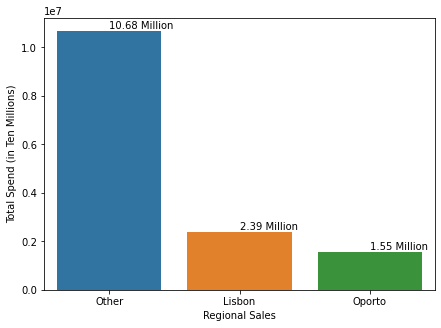

In [11]:
# confirm the same with the help of data visualization

plt.figure(figsize=(7,5))
sns.barplot( x='Region', y='Total_sum', estimator = np.sum, data=df_wcd, ci=None, orient='v')
plt.ylabel("Total Spend (in Ten Millions)")
plt.xlabel("Regional Sales")
plt.text(0, 10777599, str('10.68 Million'))
plt.text(1, 2486813, str('2.39 Million'))
plt.text(2, 1655088, str('1.55 Million'))

plt.show()

###### The above plot graph shows among Region: Other region spends more and Oporto region spends less

#### 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

In [12]:
#  Six different varities of items considered are ['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']
Var = np.array(df_wcd.iloc[0].index[2:8])

In [13]:
# Using for loop and describe function let us see the description of data points across different channels and regions

for x in Var:
    print (x, 'Items \n', df_wcd.groupby('Channel')[x].describe().T, '\n')
    print (x, 'Items \n', df_wcd.groupby('Region')[x].describe().T, '\n')

Fresh Items 
 Channel          Hotel        Retail
count       298.000000    142.000000
mean      13475.560403   8904.323944
std       13831.687502   8987.714750
min           3.000000     18.000000
25%        4070.250000   2347.750000
50%        9581.500000   5993.500000
75%       18274.750000  12229.750000
max      112151.000000  44466.000000 

Fresh Items 
 Region        Lisbon        Oporto          Other
count      77.000000     47.000000     316.000000
mean    11101.727273   9887.680851   12533.471519
std     11557.438575   8387.899211   13389.213115
min        18.000000      3.000000       3.000000
25%      2806.000000   2751.500000    3350.750000
50%      7363.000000   8090.000000    8752.500000
75%     15218.000000  14925.500000   17406.500000
max     56083.000000  32717.000000  112151.000000 

Milk Items 
 Channel         Hotel        Retail
count      298.000000    142.000000
mean      3451.724832  10716.500000
std       4352.165571   9679.631351
min         55.000000    928

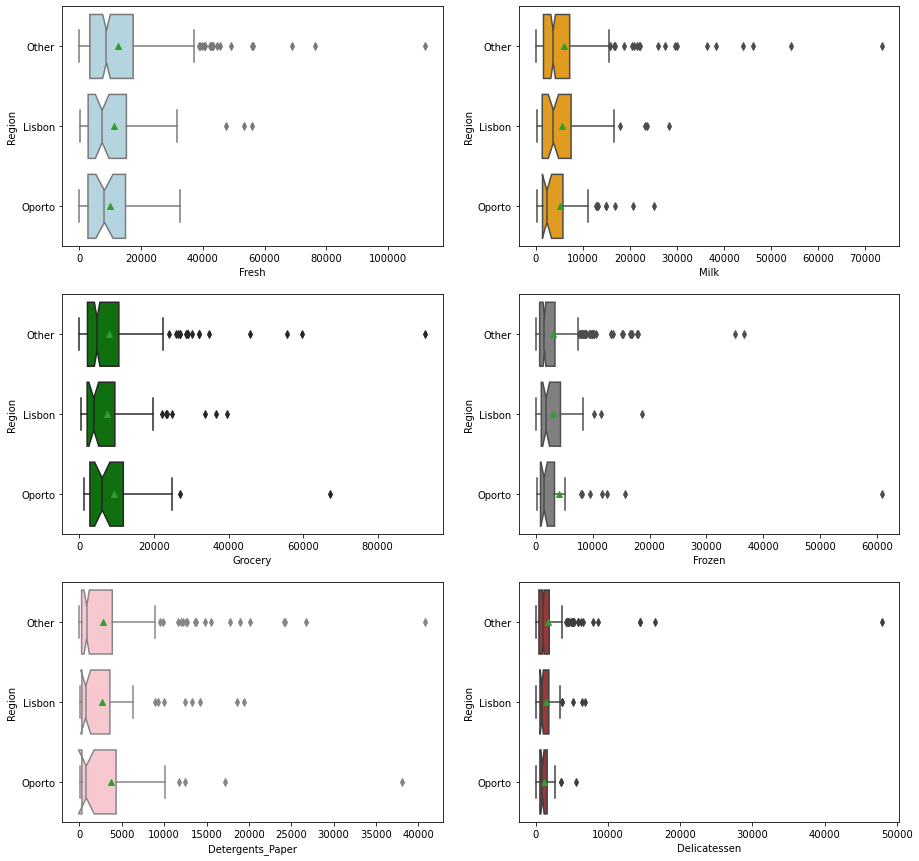

In [14]:
# visualise the same in box plot to check the behaviour of all items across each region
plt.figure(figsize= (15,15))
plt.subplot(3,2,1)
sns.boxplot(x= df_wcd.Fresh,y= df_wcd.Region, notch=True, color='lightblue', showmeans=True)

plt.subplot(3,2,2)
sns.boxplot(x= df_wcd.Milk, y= df_wcd.Region, notch=True, color='orange', showmeans=True)

plt.subplot(3,2,3)
sns.boxplot(x= df_wcd.Grocery, y= df_wcd.Region, notch=True, color='green', showmeans=True)

plt.subplot(3,2,4)
sns.boxplot(x= df_wcd.Frozen, y= df_wcd.Region, notch=True, color='grey', showmeans=True)

plt.subplot(3,2,5)
sns.boxplot(x= df_wcd.Detergents_Paper, y= df_wcd.Region, notch=True, color='pink', showmeans=True)

plt.subplot(3,2,6)
sns.boxplot(x= df_wcd.Delicatessen, y= df_wcd.Region, notch=True, color='brown', showmeans=True)

plt.show()

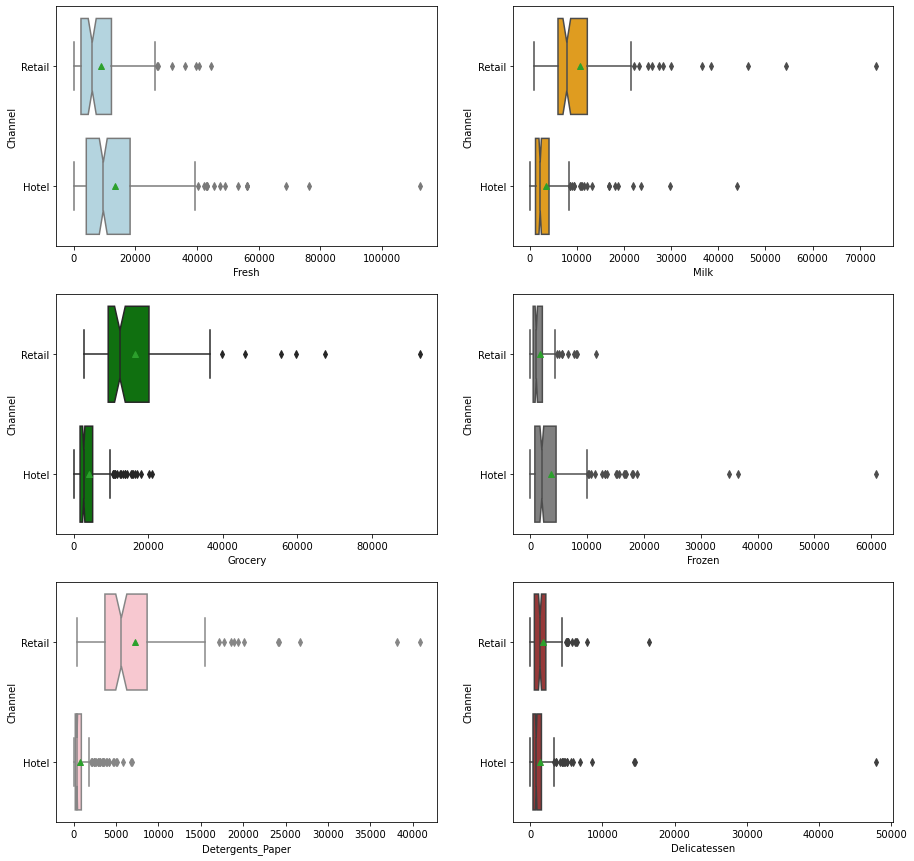

In [15]:
# visualise the same in box plot to check the behaviour of all items across each channel
plt.figure(figsize= (15,15))
plt.subplot(3,2,1)
sns.boxplot(x= df_wcd.Fresh, y= df_wcd.Channel, notch=True, color='lightblue', showmeans=True)

plt.subplot(3,2,2)
sns.boxplot(x= df_wcd.Milk, y= df_wcd.Channel, notch=True, color='orange', showmeans=True)

plt.subplot(3,2,3)
sns.boxplot(x= df_wcd.Grocery, y= df_wcd.Channel, notch=True, color='green', showmeans=True)

plt.subplot(3,2,4)
sns.boxplot(x= df_wcd.Frozen, y= df_wcd.Channel, notch=True, color='grey', showmeans=True)

plt.subplot(3,2,5)
sns.boxplot(x= df_wcd.Detergents_Paper, y= df_wcd.Channel, notch=True, color='pink', showmeans=True)

plt.subplot(3,2,6)
sns.boxplot(x= df_wcd.Delicatessen, y= df_wcd.Channel,notch=True, color='brown', showmeans=True)

plt.show()

##### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [16]:
# To understand the consistency of behaviour we will check the coefficient of variance % (standard deviation/ mean) of each item by using for loop
for col in df_wcd[Var]:
    mean_col = df_wcd[col].mean()
    std_col = df_wcd[col].std()
    cv_col = (std_col / mean_col ) * 100
    print ( col, 'items has mean of %1.2f' %mean_col, ',standard deviation of %1.f2' %std_col, 'along with coefficient of variation percentage of %1.0f' %cv_col, '%')
    print ()

print ("By observing coefficient of variation % we can check the relative measure of variability in each item. \nDelicatessen items shows the most inconsistent behaviour with coefficient of variation percentage of 185 % which means more is the spread of the data around its mean making it most inconsistent when compared to other items. \nWhereas fresh items shows the least inconsistent behaviour with coefficient of variation percentage of 105 % which means less is the spread of the data around its mean making it least inconsistent when compared to other items.")

Fresh items has mean of 12000.30 ,standard deviation of 126472 along with coefficient of variation percentage of 105 %

Milk items has mean of 5796.27 ,standard deviation of 73802 along with coefficient of variation percentage of 127 %

Grocery items has mean of 7951.28 ,standard deviation of 95032 along with coefficient of variation percentage of 120 %

Frozen items has mean of 3071.93 ,standard deviation of 48552 along with coefficient of variation percentage of 158 %

Detergents_Paper items has mean of 2881.49 ,standard deviation of 47682 along with coefficient of variation percentage of 165 %

Delicatessen items has mean of 1524.87 ,standard deviation of 28202 along with coefficient of variation percentage of 185 %

By observing coefficient of variation % we can check the relative measure of variability in each item. 
Delicatessen items shows the most inconsistent behaviour with coefficient of variation percentage of 185 % which means more is the spread of the data around its mean 

##### 1.4 Are there any outliers in the data?

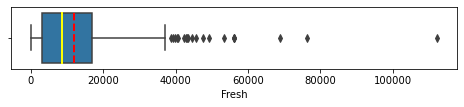

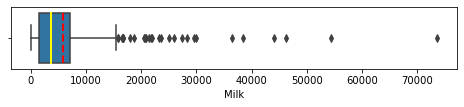

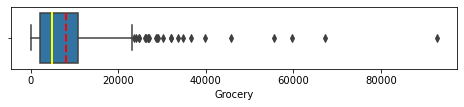

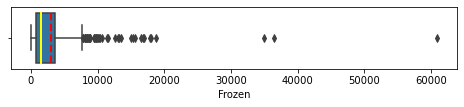

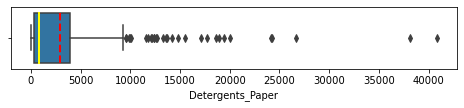

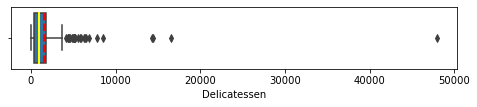

In [17]:
# using box plot to check the presence of outliers in each column
for col in df_wcd[Var]:
    plt.figure(figsize= (8,8))
    plotId = [1]
    for x in plotId:
        plt.subplot(6,1,x)
    sns.boxplot(df_wcd[col], orient='h', showmeans=True, meanline=True, medianprops={'linewidth': 2, 'color': 'yellow'},
           meanprops={'linewidth': 2, 'color': 'red'})
    plt.show()
    

In [18]:
df_wcd[Var].keys()

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [19]:
# Now check which of the rows are outliers by setting limit (IQR * 1.5)
#Select the indices for data points which are outliers
outliers  = []

# For each item find the data points with extreme high or low values
for col in df_wcd[Var].keys():
    
    # Calculate Q1 (25th percentile of the data) for the given item
    Q1 = np.percentile(df_wcd[col],25)
    
    # Calculate Q3 (75th percentile of the data) for the given item
    Q3 = np.percentile(df_wcd[col],75)
    
    # TODO: Use the interquartile range to calculate an outlier limit (1.5 times the interquartile range (IQR))
    limit = (Q3-Q1) * 1.5
    
    # Display the outliers
    print ("Data points considered outliers for the '{}' items:".format(col))
    out = df_wcd[~((df_wcd[col] >= Q1 - limit) & (df_wcd[col] <= Q3 + limit))]
    display(out)
    outliers = outliers + list(out.index.values)
   

# Creating list of outliers which are same for multiple columns.
outliers_5 = list(set([x for x in outliers if outliers.count(x) > 5]))
outliers_4 = list(set([x for x in outliers if outliers.count(x) > 4]))
outliers_3 = list(set([x for x in outliers if outliers.count(x) > 3]))
outliers_2 = list(set([x for x in outliers if outliers.count(x) > 2]))   
outliers_1 = list(set([x for x in outliers if outliers.count(x) > 1]))
outliers = list(set([x for x in outliers if outliers.count(x) == 1]))

print ("Outliers in more than 5 columns : {}".format(outliers_5))
print ("\nOutliers in more than 4 columns : {}".format(outliers_4))
print ("\nOutliers in more than 3 columns : {}".format(outliers_3))
print ("\nOutliers in more than 2 columns : {}".format(outliers_2))
print ("\nOutliers in more than 1 columns : {}".format(outliers_1))
print ("\nOutliers in atleast 1 column: {}".format(outliers))

print ()
print ("There are {} Outliers in atleast 1 column, \n{} outliers in atleast 2 columns, \n{} outliers in atleast 3 columns, \n{} outliers in atleast 4 columns, \n{} outlier in atleast 5 columns, \n{} outlier in all 6 columns" .format(len(outliers), len(outliers_1), len(outliers_2), len(outliers_3), len(outliers_4), len(outliers_5)))

Data points considered outliers for the 'Fresh' items:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_sum
29,Hotel,Other,43088,2100,2609,1200,1107,823,50927
39,Hotel,Other,56159,555,902,10002,212,2916,70746
47,Retail,Other,44466,54259,55571,7782,24171,6465,192714
52,Retail,Other,40721,3916,5876,532,2587,1278,54910
87,Hotel,Other,43265,5025,8117,6312,1579,14351,78649
103,Hotel,Other,56082,3504,8906,18028,1480,2498,90498
125,Hotel,Other,76237,3473,7102,16538,778,918,105046
129,Hotel,Other,42312,926,1510,1718,410,1819,48695
176,Hotel,Other,45640,6958,6536,7368,1532,230,68264
181,Hotel,Other,112151,29627,18148,16745,4948,8550,190169


Data points considered outliers for the 'Milk' items:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_sum
23,Retail,Other,26373,36423,22019,5154,4337,16523,110829
28,Retail,Other,4113,20484,25957,1158,8604,5206,65522
38,Retail,Other,4591,15729,16709,33,6956,433,44451
45,Retail,Other,5181,22044,21531,1740,7353,4985,62834
47,Retail,Other,44466,54259,55571,7782,24171,6465,192714
49,Retail,Other,4967,21412,28921,1798,13583,1163,71844
56,Retail,Other,4098,29892,26866,2616,17740,1340,82552
61,Retail,Other,35942,38369,59598,3254,26701,2017,165881
65,Retail,Other,85,20959,45828,36,24231,1423,92562
85,Retail,Other,16117,46197,92780,1026,40827,2944,199891


Data points considered outliers for the 'Grocery' items:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_sum
28,Retail,Other,4113,20484,25957,1158,8604,5206,65522
43,Retail,Other,630,11095,23998,787,9529,72,46111
47,Retail,Other,44466,54259,55571,7782,24171,6465,192714
49,Retail,Other,4967,21412,28921,1798,13583,1163,71844
56,Retail,Other,4098,29892,26866,2616,17740,1340,82552
61,Retail,Other,35942,38369,59598,3254,26701,2017,165881
65,Retail,Other,85,20959,45828,36,24231,1423,92562
77,Retail,Other,12205,12697,28540,869,12034,1009,67354
85,Retail,Other,16117,46197,92780,1026,40827,2944,199891
86,Retail,Other,22925,73498,32114,987,20070,903,150497


Data points considered outliers for the 'Frozen' items:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_sum
22,Hotel,Other,31276,1917,4469,9408,2381,4334,53785
39,Hotel,Other,56159,555,902,10002,212,2916,70746
40,Hotel,Other,24025,4332,4757,9510,1145,5864,49633
47,Retail,Other,44466,54259,55571,7782,24171,6465,192714
70,Hotel,Other,16705,2037,3202,10643,116,1365,34068
72,Hotel,Other,4420,5139,2661,8872,1321,181,22594
73,Retail,Other,19899,5332,8713,8132,764,648,43488
88,Hotel,Other,7864,542,4042,9735,165,46,22394
91,Hotel,Other,12754,2762,2530,8693,627,1117,28483
93,Hotel,Other,11314,3090,2062,35009,71,2698,54244


Data points considered outliers for the 'Detergents_Paper' items:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_sum
43,Retail,Other,630,11095,23998,787,9529,72,46111
47,Retail,Other,44466,54259,55571,7782,24171,6465,192714
49,Retail,Other,4967,21412,28921,1798,13583,1163,71844
56,Retail,Other,4098,29892,26866,2616,17740,1340,82552
61,Retail,Other,35942,38369,59598,3254,26701,2017,165881
65,Retail,Other,85,20959,45828,36,24231,1423,92562
77,Retail,Other,12205,12697,28540,869,12034,1009,67354
85,Retail,Other,16117,46197,92780,1026,40827,2944,199891
86,Retail,Other,22925,73498,32114,987,20070,903,150497
92,Retail,Other,9198,27472,32034,3232,18906,5130,95972


Data points considered outliers for the 'Delicatessen' items:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_sum
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100
17,Hotel,Other,5876,6157,2933,839,370,4478,20653
22,Hotel,Other,31276,1917,4469,9408,2381,4334,53785
23,Retail,Other,26373,36423,22019,5154,4337,16523,110829
24,Retail,Other,22647,9776,13792,2915,4482,5778,59390
28,Retail,Other,4113,20484,25957,1158,8604,5206,65522
36,Hotel,Other,29955,4362,5428,1729,862,4626,46962
40,Hotel,Other,24025,4332,4757,9510,1145,5864,49633
45,Retail,Other,5181,22044,21531,1740,7353,4985,62834


Outliers in more than 5 columns : [47]

Outliers in more than 4 columns : [47]

Outliers in more than 3 columns : [251, 92, 181, 47]

Outliers in more than 2 columns : [65, 163, 325, 47, 92, 49, 145, 211, 181, 85, 86, 56, 183, 251, 28, 61, 216]

Outliers in more than 1 columns : [384, 265, 145, 22, 23, 28, 284, 163, 39, 40, 171, 427, 45, 43, 47, 304, 49, 181, 437, 183, 56, 61, 319, 65, 325, 201, 331, 77, 333, 211, 85, 86, 87, 216, 343, 92, 358, 103, 109, 251, 125]

Outliers in atleast 1 column: [129, 258, 259, 2, 4, 393, 143, 401, 17, 277, 406, 24, 409, 282, 283, 155, 285, 29, 287, 413, 289, 411, 36, 38, 425, 173, 431, 176, 303, 435, 52, 436, 309, 310, 312, 195, 196, 70, 71, 72, 73, 328, 200, 202, 205, 334, 337, 338, 339, 209, 88, 218, 91, 93, 349, 351, 230, 239, 112, 240, 370, 371, 372, 377, 126, 381, 254]

There are 67 Outliers in atleast 1 column, 
41 outliers in atleast 2 columns, 
17 outliers in atleast 3 columns, 
4 outliers in atleast 4 columns, 
1 outlier in atleast 5 columns, 

##### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

1. Region : As the other region has more spending, the business in Lisbon and Oporto should be focused for business growth opportunity. 
2. Channel : As the Hotel channel has more spending, the business in Retail channel should be focused for business growth opportunity. 
3. Perishable Items : The data clearly shows the perishable items like Fresh , Milk and Grocery items are having higher average spend. Therefore the distribution of these items needs to be in focus to increase the sales.
4. Non Perishable Items : The data clearly shows the non perishable items like Frozen, Detergents_Paper and Delicatessen are having lower average spend and high inconsistency.  Therefore the distribution of these items needs to be further analyzed to reduce the costs.

# Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [20]:
# loading student survey data from CMSU
df_CMSU = pd.read_csv('Survey-1.csv')
pd.set_option('display.max_rows',None)

In [21]:
# checking the first five entries 
df_CMSU.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [22]:
# checking for shape, null values and datatype of each columns
df_CMSU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [23]:
# Using describe function checking description of categorical columns such as Unique, top, frequency and of numerical columns such as mean, std dev, min, max, quartile 1, 2,3 values.
df_CMSU.describe(include= 'all')

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


##### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

##### 2.1.1. Gender and Major

In [24]:
# using pandas crosstab to create the cross tab between gender and major (keeping gender as row variable)
pd.crosstab(df_CMSU['Gender'],df_CMSU['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


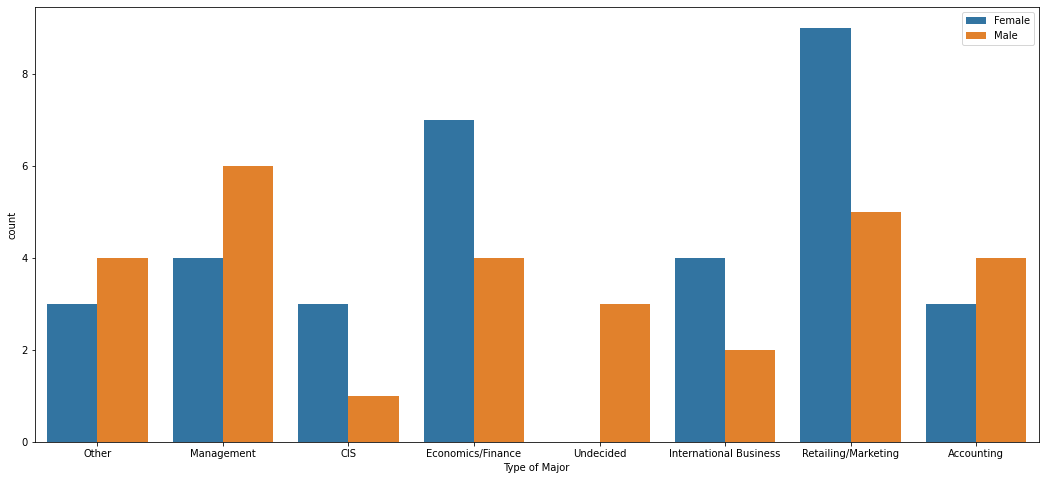

In [25]:
# visualise the above cross tab data points in countplot
plt.figure(figsize=(18,8))
sns.countplot(x=df_CMSU['Major'], hue=df_CMSU['Gender'], orient='v')
plt.xlabel('Type of Major')

plt.legend()
plt.show()

##### 2.1.2. Gender and Grad Intention

In [26]:
# using pandas crosstab to create the cross tab between gender and grad intention (keeping gender as row variable)
pd.crosstab(df_CMSU['Gender'],df_CMSU['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


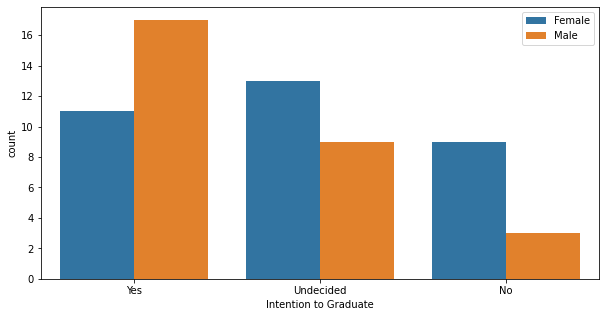

In [27]:
# visualise the above cross tab data points in countplot
plt.figure(figsize=(10,5))
sns.countplot(x=df_CMSU['Grad Intention'], hue=df_CMSU['Gender'], orient='v')
plt.xlabel('Intention to Graduate')

plt.legend()
plt.show()

##### 2.1.3. Gender and Employment

In [28]:
# using pandas crosstab to create the cross tab between gender and employment (keeping gender as row variable)
pd.crosstab(df_CMSU['Gender'],df_CMSU['Employment'],margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


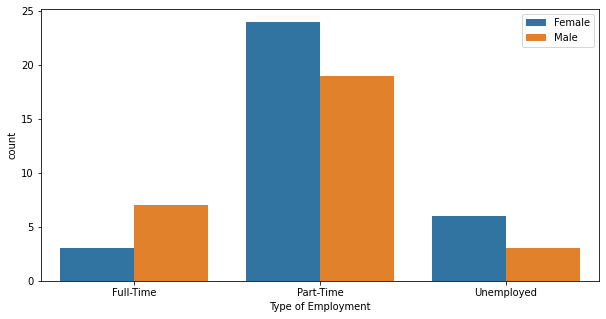

In [29]:
# visualise the above cross tab data points in countplot
plt.figure(figsize=(10,5))
sns.countplot(x=df_CMSU['Employment'], hue=df_CMSU['Gender'], orient='v')
plt.xlabel('Type of Employment')

plt.legend()
plt.show()

##### 2.1.4. Gender and Computer

In [30]:
# using pandas crosstab to create the cross tab between gender and computer (keeping gender as row variable)
pd.crosstab(df_CMSU['Gender'],df_CMSU['Computer'],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


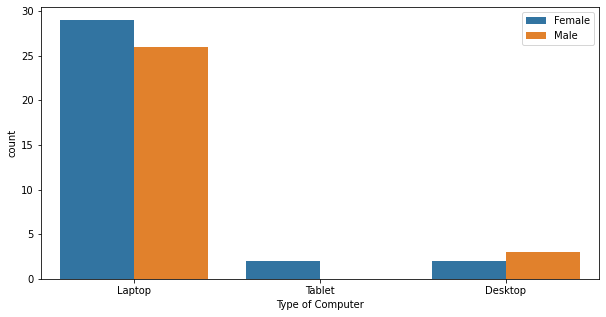

In [31]:
# visualise the above cross tab data points in countplot
plt.figure(figsize=(10,5))
sns.countplot(x=df_CMSU['Computer'], hue=df_CMSU['Gender'], orient='v')
plt.xlabel('Type of Computer')

plt.legend()
plt.show()

##### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

##### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [32]:
# using value counts function and normalise attribute check the probability of male and female
df_CMSU['Gender'].value_counts(normalize=True)

Female    0.532258
Male      0.467742
Name: Gender, dtype: float64

In [33]:
# Calculate the probability of male students

Male_student = df_CMSU['Gender'].value_counts().loc['Male']
Total_students = df_CMSU['Gender'].value_counts().sum()
Prob_Male = round(Male_student/Total_students, 5)

print('Probability of male students is %1.3f' % Prob_Male )

Probability of male students is 0.468


##### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [34]:
# Calculate the probability of female students

Female_student = df_CMSU['Gender'].value_counts().loc['Female']
Total_students = df_CMSU['Gender'].value_counts().sum()
Prob_Female = round(Female_student/Total_students, 5)

print('Probability of female students is %1.3f' % Prob_Female )

Probability of female students is 0.532


##### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

##### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [35]:
# using for loop and unique values in major column we can find the conditional probability of different majors among male students

for x in np.sort(df_CMSU['Major'].unique()):
    y = pd.crosstab(df_CMSU['Gender'],df_CMSU['Major'],margins=True,normalize=True).iloc[1].loc[x]
    z = Prob_Male
    Prob_Major_Male = y/z # Probability of different majors given male student
    
    print ('The conditional probability of',x,'majors among the male students in CMSU is %1.3f' % Prob_Major_Male, 'or chances are %1.2f' % (Prob_Major_Male * 100),'%')


The conditional probability of Accounting majors among the male students in CMSU is 0.138 or chances are 13.79 %
The conditional probability of CIS majors among the male students in CMSU is 0.034 or chances are 3.45 %
The conditional probability of Economics/Finance majors among the male students in CMSU is 0.138 or chances are 13.79 %
The conditional probability of International Business majors among the male students in CMSU is 0.069 or chances are 6.90 %
The conditional probability of Management majors among the male students in CMSU is 0.207 or chances are 20.69 %
The conditional probability of Other majors among the male students in CMSU is 0.138 or chances are 13.79 %
The conditional probability of Retailing/Marketing majors among the male students in CMSU is 0.172 or chances are 17.24 %
The conditional probability of Undecided majors among the male students in CMSU is 0.103 or chances are 10.34 %


##### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [36]:
# using for loop and unque values in major column we can find the conditional probability of different majors among female students

for x in np.sort(df_CMSU['Major'].unique()):
    y = pd.crosstab(df_CMSU['Gender'],df_CMSU['Major'],margins=True,normalize=True).iloc[0].loc[x]
    z = Prob_Female
    Prob_Major_Female = y/z # Probability of different majors given female student
    
    print ('The conditional probability of',x,'majors among the female students in CMSU is %1.5f' % Prob_Major_Female, 'or chances are %1.2f' % (Prob_Major_Female * 100),'%')

The conditional probability of Accounting majors among the female students in CMSU is 0.09091 or chances are 9.09 %
The conditional probability of CIS majors among the female students in CMSU is 0.09091 or chances are 9.09 %
The conditional probability of Economics/Finance majors among the female students in CMSU is 0.21212 or chances are 21.21 %
The conditional probability of International Business majors among the female students in CMSU is 0.12121 or chances are 12.12 %
The conditional probability of Management majors among the female students in CMSU is 0.12121 or chances are 12.12 %
The conditional probability of Other majors among the female students in CMSU is 0.09091 or chances are 9.09 %
The conditional probability of Retailing/Marketing majors among the female students in CMSU is 0.27273 or chances are 27.27 %
The conditional probability of Undecided majors among the female students in CMSU is 0.00000 or chances are 0.00 %


##### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

##### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [37]:
# With the help of crosstab between gender and grad intention, Probability of that a randomly chosen student is a male and intends to graduate

No_Male_and_IG = pd.crosstab(df_CMSU['Gender'],df_CMSU['Grad Intention'],margins=True).iloc[1].loc['Yes']
print ('Number of Male students who intend to graduate is : %1.0f' % No_Male_and_IG)
print ('Number of male students is : %1.0f' %Male_student)
Prob_Male_and_IG = No_Male_and_IG / Male_student


print ('The probability that a randomly chosen student is a male and intends to graduate is %1.4f' % Prob_Male_and_IG, 'or chances are %1.2f' %(Prob_Male_and_IG*100),'%')

Number of Male students who intend to graduate is : 17
Number of male students is : 29
The probability that a randomly chosen student is a male and intends to graduate is 0.5862 or chances are 58.62 %


##### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [38]:
# seperate the subset data of students who does not have a laptop
df_CMSU[(df_CMSU['Computer'] != 'Laptop')]

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
12,13,Male,22,Senior,International Business,Undecided,3.4,Part-Time,40.0,2,3,400,Desktop,45
35,36,Female,26,Junior,Accounting,Yes,3.3,Part-Time,60.0,1,4,450,Desktop,300
40,41,Male,22,Junior,Accounting,Yes,3.2,Full-Time,60.0,1,4,680,Desktop,200
44,45,Female,21,Senior,International Business,No,3.0,Part-Time,30.0,2,5,650,Desktop,500
50,51,Female,21,Junior,Management,No,3.5,Unemployed,35.0,2,4,600,Tablet,100
54,55,Male,21,Senior,Other,Yes,3.4,Part-Time,50.0,1,4,250,Desktop,700


In [39]:
# Calculating the Probability of that a randomly chosen student is a female and does not have a laptop

Number_female_without_laptop = df_CMSU[(df_CMSU['Computer'] != 'Laptop')].groupby('Gender')['Computer'].count().iloc[0]
print ('Number of Female students who does not have laptop : %1.0f' % Number_female_without_laptop)
print ('Number of Female students is : %1.0f' %Female_student)

Prob_female_without_laptop = Number_female_without_laptop / Female_student



print ('The probability that a randomly chosen student is a female and does not have a laptop is %1.4f' % Prob_female_without_laptop, 'or chances are %1.2f' %(Prob_female_without_laptop*100),'%')

Number of Female students who does not have laptop : 4
Number of Female students is : 33
The probability that a randomly chosen student is a female and does not have a laptop is 0.1212 or chances are 12.12 %


##### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

##### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [40]:
# Calculating the Probability of that a randomly chosen student is a male or has full-time employment

print ('Probability of male students is : %1.3f' % Prob_Male, '\n')

Prob_Fulltime = pd.crosstab(df_CMSU['Gender'],df_CMSU['Employment'],margins=True,normalize=True).iloc[2].loc['Full-Time']
print ('Probability of students with full-time employment is : %1.3f' %Prob_Fulltime, '\n')

Prob_Male_and_Fulltime = pd.crosstab(df_CMSU['Gender'],df_CMSU['Employment'],margins=True,normalize=True).iloc[1].loc['Full-Time']
print ('Probability of male students with full-time employment: %1.3f' %Prob_Male_and_Fulltime, '\n')

Prob_Male_or_Fulltime = Prob_Male + Prob_Fulltime - Prob_Male_and_Fulltime
print ('Since the Probability of male students with full time is included in both probability of male and probaility of full-time employment individually, therefore we will reduce the same from the sum of the both to get the probability that a randomly chosen student is either a male or has full-time employment is %1.4f' % Prob_Male_or_Fulltime, 'or chances are %1.2f' %(Prob_Male_or_Fulltime*100),'%')

Probability of male students is : 0.468 

Probability of students with full-time employment is : 0.161 

Probability of male students with full-time employment: 0.113 

Since the Probability of male students with full time is included in both probability of male and probaility of full-time employment individually, therefore we will reduce the same from the sum of the both to get the probability that a randomly chosen student is either a male or has full-time employment is 0.5161 or chances are 51.61 %


##### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [41]:
# Calculate the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

No_Female_and_intBusiness = pd.crosstab(df_CMSU['Gender'],df_CMSU['Major'],margins=True).iloc[0].loc['International Business']
print ('Number of female students who are majoring in international business is : %1.0f' %No_Female_and_intBusiness)

Prob_intBusiness_given_female = No_Female_and_intBusiness / Female_student

print ('Probability female students who are majoring in international business is : %1.4f' %Prob_intBusiness_given_female)

No_Female_and_Management = pd.crosstab(df_CMSU['Gender'],df_CMSU['Major'],margins=True).iloc[0].loc['Management']
print ('Number of female students who are majoring in Management is : %1.0f' %No_Female_and_Management)

Prob_Management_given_female = No_Female_and_Management / Female_student

print ('Probability female students who are majoring in Management is : %1.4f' %Prob_Management_given_female)


Prob_intBusiness_or_Management_given_female = Prob_intBusiness_given_female + Prob_Management_given_female
print ('The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is %1.4f' % Prob_intBusiness_or_Management_given_female, 'or chances are %1.2f' %(Prob_intBusiness_or_Management_given_female*100),'%')

Number of female students who are majoring in international business is : 4
Probability female students who are majoring in international business is : 0.1212
Number of female students who are majoring in Management is : 4
Probability female students who are majoring in Management is : 0.1212
The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is 0.2424 or chances are 24.24 %


##### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [42]:
# storing the crosstab in variable and droping the undecided students from the cross tab for further analysis:
frame = pd.crosstab(df_CMSU['Grad Intention'],df_CMSU['Gender'])
frame = frame.drop(['Undecided'], axis=0)
print (frame)
print ()

print ('Number of female students is %1.0f' %Female_student)
print ()

No_IG = df_CMSU[(df_CMSU['Grad Intention'] == 'Yes')]['Gender'].count()
print ('Number of students with intention to graduate %1.0f' %No_IG)
print ()

No_Female_and_IG = frame.iloc[1].iloc[0]
print ('Number of female students with intention to graduate %1.0f' %No_Female_and_IG)
print ()


# Assuming the sample is representative of the population of CMSU and out of total 62 students sample survey collected. 

print ('Let A be the event of student being female then P(A) is %1.4f' %Prob_Female, 'or %1.2f' %(Prob_Female*100),'% chances.')
print ('Let B be the event of student intending to graduate then P(B) is %1.4f' %(No_IG/Total_students),'or %1.2f' %((No_IG/Total_students)*100),'% chances.')
print ('The conditional probability of female students given intention to graduate is P(A|B)  is %1.4f' %(No_Female_and_IG/No_IG),'or %1.2f' %((No_Female_and_IG/No_IG)*100),'% chances.')
print ('The conditional probability of students who intend to graduate given female is P(B|A) is %1.4f' %(No_Female_and_IG/Female_student),'or %1.2f' %((No_Female_and_IG/Female_student)*100),'% chances.')
print()
print ('Since P(A|B) ≠ P(A) or  P(B|A) ≠ P(B), Therefore graduate intention and being female are not independent events.')
print ()
print ('Also from the contingency table we can see there are %1.0f' %frame.iloc[1].loc['Female'], 'female students who have graduate intention, therefore the graduate intention and being female are not independent events ')

Gender          Female  Male
Grad Intention              
No                   9     3
Yes                 11    17

Number of female students is 33

Number of students with intention to graduate 28

Number of female students with intention to graduate 11

Let A be the event of student being female then P(A) is 0.5323 or 53.23 % chances.
Let B be the event of student intending to graduate then P(B) is 0.4516 or 45.16 % chances.
The conditional probability of female students given intention to graduate is P(A|B)  is 0.3929 or 39.29 % chances.
The conditional probability of students who intend to graduate given female is P(B|A) is 0.3333 or 33.33 % chances.

Since P(A|B) ≠ P(A) or  P(B|A) ≠ P(B), Therefore graduate intention and being female are not independent events.

Also from the contingency table we can see there are 11 female students who have graduate intention, therefore the graduate intention and being female are not independent events 


##### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data

##### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [43]:
# Make a list of all GPA values in the GPA column and store in variable 'a'.
a = df_CMSU['GPA'].tolist()

In [44]:
#filter the values less than 3 fom the list a
GPA_less_than_3 = list(filter((lambda x: x < 3), a))
print ('No. of students with GPA values less than 3 is : %1.0f' % (len(GPA_less_than_3)))
print()

Prob_GPA_less_than_3 = len(GPA_less_than_3)/len(a)
print ('If a student is chosen randomly, the probability that his/her GPA is less than 3 is %1.4f' %Prob_GPA_less_than_3 ,'or have %1.2f' %(Prob_GPA_less_than_3*100), '% chances')

No. of students with GPA values less than 3 is : 17

If a student is chosen randomly, the probability that his/her GPA is less than 3 is 0.2742 or have 27.42 % chances


##### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [45]:
# Add the boolean column for the salary 50 or more for further analysis
df_CMSU['Salary_50_or_more'] = (df_CMSU['Salary'] >= 50)
df_CMSU[df_CMSU['Salary_50_or_more'] == True]

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages,Salary_50_or_more
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200,True
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30,True
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50,True
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300,True
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200,True
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400,True
16,17,Female,19,Junior,CIS,Undecided,3.7,Part-Time,55.0,1,4,450,Laptop,150,True
17,18,Male,21,Junior,Economics/Finance,Undecided,3.1,Part-Time,55.0,2,3,600,Laptop,300,True
18,19,Male,19,Junior,Economics/Finance,Yes,3.5,Part-Time,52.0,2,5,500,Laptop,300,True
19,20,Female,20,Junior,Management,Undecided,3.2,Unemployed,60.0,2,6,300,Laptop,350,True


In [46]:
# check the value counts of the boolean column grouped by gender
df_CMSU.groupby(by=['Gender'])['Salary_50_or_more'].value_counts()

Gender  Salary_50_or_more
Female  True                 18
        False                15
Male    False                15
        True                 14
Name: Salary_50_or_more, dtype: int64

In [47]:
# Calculate the conditional probability that a randomly selected male earns 50 or more. 
# and the conditional probability that a randomly selected female earns 50 or more.

Male_earns_50_or_more = df_CMSU.groupby(by=['Gender'])['Salary_50_or_more'].value_counts().iloc[3]
Female_earns_50_or_more = df_CMSU.groupby(by=['Gender'])['Salary_50_or_more'].value_counts().iloc[0]
Prob_Male_earns_50_or_more = Male_earns_50_or_more / Male_student
Prob_Female_earns_50_or_more = Female_earns_50_or_more / Female_student
print ()
print ('The conditional probability that a randomly selected male earns 50 or more is %1.4f' %(Prob_Male_earns_50_or_more), 'or have %1.2f' %(Prob_Male_earns_50_or_more*100), '% chances.')
print ()
print ('The conditional probability that a randomly selected female earns 50 or more is %1.4f' %(Prob_Female_earns_50_or_more), 'or have %1.2f' %(Prob_Female_earns_50_or_more*100), '% chances.')


The conditional probability that a randomly selected male earns 50 or more is 0.4828 or have 48.28 % chances.

The conditional probability that a randomly selected female earns 50 or more is 0.5455 or have 54.55 % chances.


##### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution.

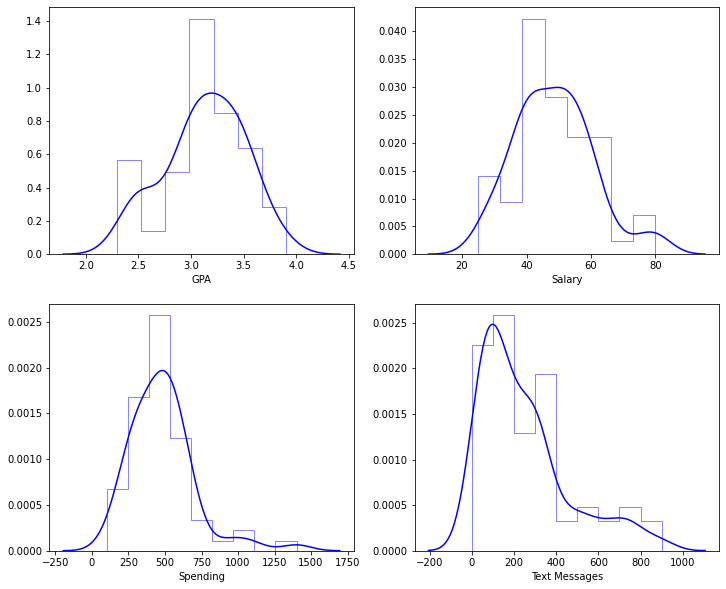

In [48]:
# checking normalisation through distplot
plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
sns.distplot(df_CMSU['GPA'] , bins='auto', color='blue', hist_kws={"histtype": "step", "linewidth": 0.5, "alpha": 0.95}, kde=True)
plt.xlabel("GPA")


plt.subplot(2,2,2)
sns.distplot(df_CMSU['Salary'] , bins='auto', color='blue', hist_kws={"histtype": "step", "linewidth": 0.5, "alpha": 0.95}, kde=True)
plt.xlabel("Salary")


plt.subplot(2,2,3)
sns.distplot(df_CMSU['Spending'] , bins='auto', color='blue', hist_kws={"histtype": "step", "linewidth": 0.5, "alpha": 0.95}, kde=True)
plt.xlabel("Spending")

plt.subplot(2,2,4)
sns.distplot(df_CMSU['Text Messages'] , bins='auto', color='blue', hist_kws={"histtype": "step", "linewidth": 0.5, "alpha": 0.95}, kde=True)
plt.xlabel("Text Messages")

plt.show()

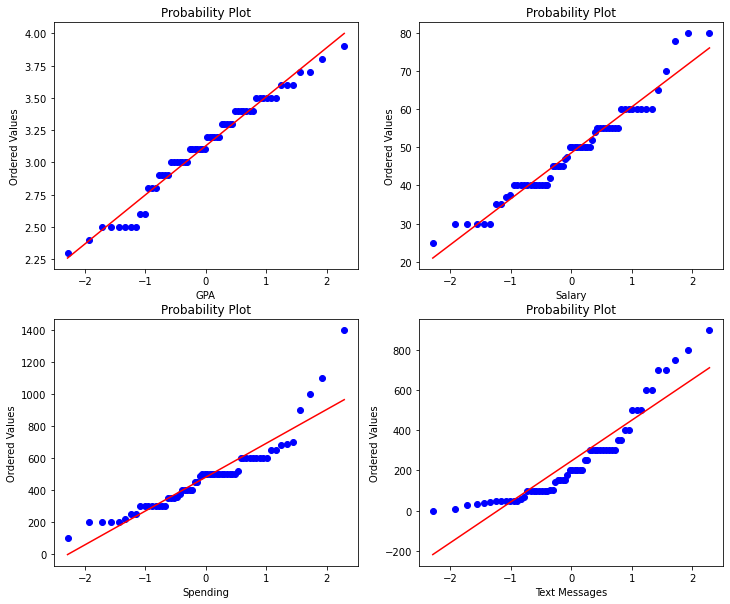

In [49]:
# checking normalisation through QQ plot

plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
stats.probplot(df_CMSU['GPA'], dist="norm", plot=plt)
plt.xlabel("GPA")

plt.subplot(2,2,2)
stats.probplot(df_CMSU['Salary'], dist="norm", plot=plt)
plt.xlabel("Salary")

plt.subplot(2,2,3)
stats.probplot(df_CMSU['Spending'], dist="norm", plot=plt)
plt.xlabel("Spending")

plt.subplot(2,2,4)
stats.probplot(df_CMSU['Text Messages'], dist="norm", plot=plt)
plt.xlabel("Text Messages")

plt.show()

In [50]:
# checking normalixzation with the help of shapiro test
print ('Shapiro-The test assume that that the sample was drawn from a Normal distribution. Technically this is called the null hypothesis, or H0. \nA threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.')

print ()
columns = ["GPA", "Salary", "Spending", "Text Messages"]
# Shapiro test for normality
for x in df_CMSU[columns]:
    stat, p_value = stats.shapiro(df_CMSU[x])
    print ('For {}' .format(x))
    print('W Statistics = %.3f, \np value = %.3f' % (stat, p_value))
    # interpret
    alpha = 0.05
    if p_value > alpha:
        print(x,'Sample looks Normally distributed (fail to reject null Hypothesis)')
        print()
    else:
        print(x,'Sample does not look Normally distributed (reject null Hypothesis)')
        print()

Shapiro-The test assume that that the sample was drawn from a Normal distribution. Technically this is called the null hypothesis, or H0. 
A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

For GPA
W Statistics = 0.969, 
p value = 0.112
GPA Sample looks Normally distributed (fail to reject null Hypothesis)

For Salary
W Statistics = 0.957, 
p value = 0.028
Salary Sample does not look Normally distributed (reject null Hypothesis)

For Spending
W Statistics = 0.878, 
p value = 0.000
Spending Sample does not look Normally distributed (reject null Hypothesis)

For Text Messages
W Statistics = 0.859, 
p value = 0.000
Text Messages Sample does not look Normally distributed (reject null Hypothesis)



##### Write a note summarizing your conclusions.

Summary:

The survey data of 62 undergraduate students collected by the Student News Service at Clear Mountain State University (CMSU). Assuming the sample is representative of the population of CMSU following conclusions were made :

<br>- The strength of Female students (ie. 53% ) are slightly more than the Male students (ie. 46%).
<br>- Majoring in Management was top preference of Male students while Economics/Finance was of keen interest among Female students
<br>- Intention to graduate was more masculine than feminine.
<br>- In terms of employment only 14.5% were unemployed, rest 84.5% of students had either part-time or full-time jobs.
<br>- Laptops are most commonly used (by approx. 88% students) compared to desktop and tablets.
<br>- Less than one-third of students (ie. 27.42%) have GPA score less than 3.
<br>- Almost 52% of students have the salary of 50 or more.

# Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [51]:
# reading data into pandas dataframe
df_ABS = pd.read_csv('A & B shingles-1.csv')

##### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

## Testing for Type A

In [52]:
# for A type of shingles we have 36 measurements recorded 
n1 = df_ABS['A'].count()
print ('No. of measurements for type A shingles is : {}' .format(n1))

No. of measurements for type A shingles is : 36


#### Step 1 : Define null and alternative hypothesis

In testing the mean moisture content in type A is less than 0.35 pound per 100 square feet.

#### Null hypothesis states that mean moisture content in type A, $\mu$ is equal and greater than 0.35 pounds per 100 sq feet .
#### Alternative hypothesis states that the mean moisture content in type A, $\mu$ is less than 0.35 pounds per 100 sq feet .

* $H_0$: $\mu$ >= 0.35
* $H_A$: $\mu$ < 0.35

#### Step 2 : Decide the significance level

Here we select $\alpha$ = 0.05

#### Step 3: Identify the test statistic

In the given problem statement, We do not know the population standard deviation and n = 36. So we use the t distribution and the $t_{STAT}$ test statistic.

#### Step 4: Calculate the p - value and test statistic

**scipy.stats.ttest_1samp calculates the t test for the mean of one sample given the sample observations and  the expected value in the null hypothesis. This function returns t statistic and the two-tailed p value.**

In [53]:
# one sample t-test
# null hypothesis: expected value = 0.35
t_statistic, p_value = stats.ttest_1samp(df_ABS['A'], 0.35,axis=0, nan_policy='omit')
one_tailed_p_value = p_value/2
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, one_tailed_p_value))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


#### Step 5: Decide to reject or accept null hypothesis


In [54]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if one_tailed_p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since one tailed p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since one tailed p value > Level of significance') 

print ("Our one-sample t-test one tailed p-value=", one_tailed_p_value)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since one tailed p value > Level of significance
Our one-sample t-test one tailed p-value= 0.07477633144907513


## Testing for Type B

In [55]:
# for B type of shingles we have 31 measurements recorded. Lets check!!
n2 = df_ABS['B'].count()
print ('No. of measurements for type A shingles is : {}' .format(n2))

No. of measurements for type A shingles is : 31


#### Step 1 : Define null and alternative hypothesis

In testing the mean moisture content in type B is less than 0.35 pound per 100 square feet.

#### Null hypothesis states that mean moisture content in type B, $\mu$ is equal and greater than 0.35 pounds per 100 sq feet .
#### Alternative hypothesis states that the mean moisture content in type B, $\mu$ is less than 0.35 pounds per 100 sq feet .

* $H_0$: $\mu$ >= 0.35
* $H_A$: $\mu$ < 0.35

#### Step 2 : Decide the significance level

Here we select $\alpha$ = 0.05

#### Step 3: Identify the test statistic

In the given problem statement, We do not know the population standard deviation and n = 36. So we use the t distribution and the $t_{STAT}$ test statistic.

#### Step 4: Calculate the p - value and test statistic

**scipy.stats.ttest_1samp calculates the t test for the mean of one sample given the sample observations and  the expected value in the null hypothesis. This function returns t statistic and the two-tailed p value.**

In [56]:
# one sample t-test
# null hypothesis: expected value = 0.35
t_statistic, p_value = stats.ttest_1samp(df_ABS['B'], 0.35,axis=0, nan_policy='omit')

one_tailed_p_value = p_value/2

print('\n One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, one_tailed_p_value))


 One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


#### Step 5: Decide to reject or accept null hypothesis


In [57]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if one_tailed_p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since one tailed p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since one tailed p value > Level of significance') 

print ("Our one-sample t-test one tailed p-value=", one_tailed_p_value)

Level of significance: 0.05
We have evidence to reject the null hypothesis since one tailed p value < Level of significance
Our one-sample t-test one tailed p-value= 0.0020904774003191826


##### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### Step 1: Define null and alternate hypothesis

In testing whether the population mean moisture content of both types A and B shingles are same, the null hypothesis states that the population mean moisture content of both types A and B shingles are the same, $\mu{A}$ equals $\mu{B}$. The alternative hypothesis states that the population mean moisture content of both types A and B shingles are different, $\mu{A}$ is not equal to $\mu{B}$.

* $H_0$: $\mu{A}$ - $\mu{B}$ =      0 i.e        $\mu{A}$ = $\mu{B}$
* $H_A$: $\mu{A}$ - $\mu{B}$ $\neq$  0 i.e      $\mu{A}$ $\neq$ $\mu{B}$

#### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 and the population standard deviation is not known.

#### Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are  different.
* The sample is a large sample, n > 30. So you use the t distribution and the $t_{STAT}$ test statistic for two sample unpaired test.

#### Step 4: Calculate teh p-value and test statistic

** We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [58]:
t_statistic, p_value  = ttest_ind(df_ABS['A'],df_ABS['B'], axis=0, equal_var=True, nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value) 

tstat 1.2896282719661123
P Value 0.2017496571835306


#### Step 5: Decide to reject or accept null hypothesis

In [59]:
# p_value > 0.05 => hence fail to reject null hypothesis:
# the population mean moisture content of both types A and B shingles are same at the 5% significance level
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population mean moisture content of both types A and B shingles are different.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population mean moisture content of both types A and B shingles are same.')

two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the population mean moisture content of both types A and B shingles are same.


## Thank you
##### Submitted by Reji Thankachan Oomman